In [1]:
def sigmoid(z):
    sigmoid=1./(1 + np.exp(-z))
    return sigmoid

In [2]:
def forward_prop(X,Y,b1,W1,W2,b2,reg):
    Z=np.dot(X,W1)+np.transpose(b1)
    A=sigmoid(Z)
    y_hat=np.dot(A,W2)+np.transpose(b2)
    m=X.shape[0]
    mse =1/m* np.sum(np.square((Y - y_hat)))
    Loss=mse+ reg*(np.sum(W1**2)+np.sum(W2**2))
    cache={"y_hat":y_hat,"Z":Z,"A":A}
    return Loss,cache


In [3]:

def back_prop(X,Y,W1,W2,b1,b2,cache,reg):
    m=Y.shape[0]
    y_hat=cache["y_hat"]
    A=cache["A"]
    Z=cache["Z"]
    dy_hat =(1./m)*2.0*(y_hat-Y)
    dW2=np.dot(A.T,dy_hat) + reg*W2
    db2 =np.sum(dy_hat,axis=0)
    dA = np.dot(y_hat,W2.T)
    dZ = dA *A*(1-A)
    dW1 =np.dot(X.T, dZ)+reg*W1
    db1=np.sum(dZ,axis=0)
    gradients={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    return gradients

In [4]:
def accuracy(y_hat,y):
    y_hat = np.argmax(y_hat,axis=1)
    y= np.argmax(y,axis=1)
    accuracy=np.sum(y_hat==y)/y.size 
    return accuracy

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:' , x_train.shape)
H=200#no of hidden layers
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train,x_test=x_train/255.0,x_test/255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))#shaping images into a vector Din=32x32x3
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
std=1e-2
#np.random.seed(1)
W1 = std*np.random.randn(Din, H)#W1 initialization
b1 = np.zeros(H)#b1 initialization
W2 = std*np.random.randn(H, K)#W2 initialization
b2 = np.zeros(K)#b2 initialization
print("W1:", W1.shape)
print("b1:", b1.shape)
print("W2:", W2.shape)
print("b2:", b2.shape)
batch_size = Ntr #for the batch size whole dataset is considered

iterations =300
lr =0.0055
lr_decay=0.999#learning rate is decreased in each iteration
reg =1e-7#regularization term which stops growth of weights
train_loss_history = []
test_loss_history=[]
train_acc_history = []
test_acc_history = []

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)#generating image indices
    rng.shuffle(indices)
    x_train=x_train[indices]
    y_train=y_train[indices]
    
    # Forward pass
    
    loss,cache=forward_prop(W1=W1,b1=b1,W2=W2,b2=b2,X=x_train,Y=y_train,reg=reg)
   
    train_acc=accuracy(cache["y_hat"],y_train)
    train_acc_history.append(train_acc)
    train_loss_history.append(loss)

    test_loss,test_cache=forward_prop(X=x_test,Y=y_test,W1=W1,b1=b1,W2=W2,b2=b2,reg=reg)
   
    test_acc=accuracy(test_cache["y_hat"],y_test)
    test_acc_history.append(test_acc)
    test_loss_history.append(test_loss)

    if t%10==0:
        print("Epoch "+str(t+1)+"/"+str(iterations)+">>> trainig_loss: ",loss,">>training_accuracy: ",train_acc,">>testing_loss:",test_loss,">>>testing_accuracy:",test_acc)

    # Backward pass
    gradients=back_prop(X=x_train,Y=y_train,W1=W1,W2=W2,b1=b1,b2=b2,cache=cache,reg=reg)
    dW1=gradients["dW1"]
    db1=gradients["db1"]
    dW2=gradients["dW2"]
    db2=gradients["db2"]

    W1-=lr*dW1
    b1-=lr*b1
    W2-=lr*dW2
    b2-=lr*db2
    lr*=lr_decay



x_train: (50000, 32, 32, 3)
W1: (3072, 200)
b1: (200,)
W2: (200, 10)
b2: (10,)
Epoch 1/300>>> trainig_loss:  1.0349462951708759 >>training_accuracy:  0.09586 >>testing_loss: 1.034944527633642 >>>testing_accuracy: 0.0962
Epoch 11/300>>> trainig_loss:  0.893184035780623 >>training_accuracy:  0.15222 >>testing_loss: 0.8929071824989147 >>>testing_accuracy: 0.1518
Epoch 21/300>>> trainig_loss:  0.8944244342678177 >>training_accuracy:  0.15038 >>testing_loss: 0.8940645949506222 >>>testing_accuracy: 0.155
Epoch 31/300>>> trainig_loss:  0.8936003040233867 >>training_accuracy:  0.15604 >>testing_loss: 0.8934518168605244 >>>testing_accuracy: 0.1581
Epoch 41/300>>> trainig_loss:  0.8969826049676347 >>training_accuracy:  0.14494 >>testing_loss: 0.8968001275232999 >>>testing_accuracy: 0.1471
Epoch 51/300>>> trainig_loss:  0.8962281134734933 >>training_accuracy:  0.15436 >>testing_loss: 0.8957846551912546 >>>testing_accuracy: 0.1689
Epoch 61/300>>> trainig_loss:  0.8938139236965048 >>training_accura

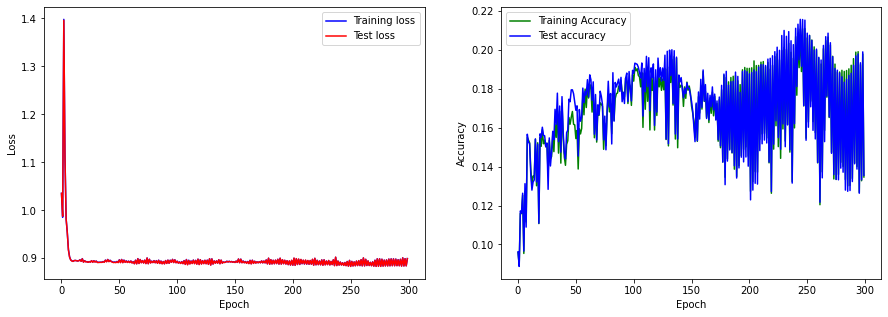

In [6]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(train_loss_history,'b')
ax[0].plot(test_loss_history,'r')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')  
ax[0].legend(['Training loss','Test loss'])

ax[1].plot(train_acc_history,'g')
ax[1].plot(test_acc_history,'b')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')  
ax[1].legend(['Training Accuracy','Test accuracy'])